# Regression Model to Predict Average Price per Kilogram

This model's task is to predict the average price per kilogram and stock on hand for **Golden Delicious Apples**.

<img src="https://cdn.shopify.com/s/files/1/0271/7823/8041/products/golden-delicious-apple_2048x2048.jpg" alt="Golden Delicious Apples" title="Golden Delicious Apples" />

Providing an accurate and robust solution has immense economic potential, for users to be able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to, using a set of features (Weight, Low Price, High Price, etc.).


## Import Packages

Importing:
- numpy for mathemticial calculations
- pandas to read and store data as Data Frames
- seasborn and matplotlib for visualisations
- scikit learn for Regression Models, Model Selection, Pre-processing and Metrics
- scipy for Stats
- pickle to save the model

In [65]:
# Numpy and Pandas
import numpy as np
import pandas as pd

# Scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline


#Extra Modules
from scipy import stats
import pickle

## Importing Data

In [3]:
train = pd.read_csv('df-train_set.csv')
test = pd.read_csv('df-test_set.csv')

## Checking Data

Firstly, we take a quick look at the data from our training set

In [208]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
train['Date'] = pd.to_datetime(train['Date'])
train['Day'] = train['Date'].dt.day
train['Month'] = train['Date'].dt.month
train.drop(['Date'], inplace = True, axis = 1)

In [5]:
train.shape

(64376, 14)

The data frame has 64376 rows and 14 columns

As shown above, it is easy to see what data type each column has but the **info** method can confirm that.

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Low_Price         64376 non-null  float64
 6   High_Price        64376 non-null  float64
 7   Sales_Total       64376 non-null  float64
 8   Total_Qty_Sold    64376 non-null  int64  
 9   Total_Kg_Sold     64376 non-null  float64
 10  Stock_On_Hand     64376 non-null  int64  
 11  avg_price_per_kg  64376 non-null  float64
 12  Day               64376 non-null  int64  
 13  Month             64376 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 6.9+ MB


The display of each column above was enough to show that none of the columns contains null or missing values. 

### Removing unneccessary features
Just by looking at the Data Frame, it seems that there are features that are not required. 
To start with, the model's focus is on the **Golden Delicious Apples**, therefore the other commodities could be filtered out. <br>
<br><br>
After filtering, we know that all rows are **Golden Delicious Apples** Commodities, therefore the **Commodities** feature is not required.

In [6]:
train = train.query('Commodities == "APPLE GOLDEN DELICIOUS"')
train.drop(['Commodities'], inplace = True, axis = 1)
train.head()

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9
7,CAPE,JG110,2M,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4
40,CAPE,M4183,1S,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5
69,EASTERN CAPE,IA400,1S,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9


##### Everything looks good, now the dataset is ready to be explored 

## Exploratory Data Analysis

###  Univariate Analysis

#### Statistical Overview

In [8]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893,15.866291,5.609119
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744,8.705740,2.687248
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000,1.000000,1.000000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000,9.000000,3.000000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000,16.000000,6.000000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000,23.000000,7.000000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000,31.000000,12.000000


Below we will be calculating the **kurtosis** and **skew** to measure the presents of outliers and the distribution of our data respectively.
<br>
- If the skewness is between -0.5 and 0.5, the data is fairly symmetrical.
- If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data is moderately skewed.
- If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data is highly skewed

<br>
<img src = "https://miro.medium.com/max/600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg" alt = "Skewness" title = "Skewness"></img>
<br>

In [9]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
Day                -0.021883
Month               0.078651
dtype: float64

The feature `Day` is fairly symmetrical; `avg_price_per_kg` and `Month` are moderately skewed in a positive direction; `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_total`, `Total_Qty_Sold`, `Total_Kg_Sold` and `Stock_On_Hand` are highly skewed in the positive direction.

In [10]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
Day                 -1.122178
Month               -0.620111
dtype: float64

Kurtosis indicates that `Weight_Kg`, `Low_Price`, `High_Price`, `Sales_total`, `Total_Qty_Sold`, `Total_Kg_Sold` and `Stock_On_Hand` has a fairly high measure of outliers present. While `Day`, `avg_price_per_kg` and `Month` indicates a lack of outliers.

#### Visualisation Overview

Visualisation of all numeric features

In [40]:
#Template for all plots
template = 'plotly_dark'

In [107]:
fig = px.histogram(train, 
                   x = 'Weight_Kg', 
                   template = template, 
                   nbins = 30, 
                   title = 'Weight per kg', 
                   labels = {'Weight_Kg': 'Weight/kg'})
fig.show()

In [124]:
#Make subplots for the features whose x axes has similiar ranges
fig = make_subplots(rows = 2, 
                    cols = 2, 
                    subplot_titles = ("Low Price", "High Price", "Total Quantity Sold", "Stock On Hand"), 
                    y_title = 'count', 
                   shared_yaxes = True,
                   shared_xaxes = 'rows')

#Adding 4 features into Histograms and updating the layout of the figure
fig.add_trace(go.Histogram(x = train['Low_Price'], 
                           name = 'Low Price'), 
              row = 1, 
              col = 1)

fig.add_trace(go.Histogram(x = train['High_Price'], 
                           name = 'High Price'), 
              row = 1, 
              col = 2)

fig.add_trace(go.Histogram(x = train['Total_Qty_Sold'], 
                           name = 'Total Quantity Sold'), 
              row = 2, 
              col = 1)

fig.add_trace(go.Histogram(x = train['Stock_On_Hand'], 
                           name = 'Stock On Hand'), 
              row = 2, 
              col = 2)

fig.update_layout(height = 720, 
                  width = 1050,
                  title_text = "Low Price vs High Price vs Total Quantity Sold vs Stock On Hand", 
                  template = template)

In [128]:
#Make subplots for the features whose x axes has similiar ranges
fig = make_subplots(rows = 1, 
                    cols = 2, 
                    subplot_titles = ("Sales Total", "Total KG Sold"), 
                    y_title = 'count', 
                   shared_yaxes = True,
                   shared_xaxes = 'rows')

#Adding 2 features into Histograms and updating the layout of the figure
fig.add_trace(go.Histogram(x = train['Sales_Total'], 
                           name = 'Sales Total'), 
              row = 1, 
              col = 1)

fig.add_trace(go.Histogram(x = train['Total_Kg_Sold'], 
                           name = 'Total KG Sold'), 
              row = 1, 
              col = 2)

fig.update_layout(height = 400, 
                  width = 1050,
                  title_text = "Sales Total vs Total KG Sold", 
                  template = template)

In [132]:
#Make subplots for the features whose x axes has similiar ranges
fig = make_subplots(rows = 2, 
                    cols = 2, 
                    subplot_titles = ("Average Price per KG", "Day", "Month"), 
                    y_title = 'count', 
                   shared_yaxes = True,
                   shared_xaxes = 'rows')

#Adding 3 features into Histograms and updating the layout of the figure
fig.add_trace(go.Histogram(x = train['avg_price_per_kg'], 
                           name = 'Average Price per KG'), 
              row = 1, 
              col = 1)

fig.add_trace(go.Histogram(x = train['Day'], 
                           name = 'Day'), 
              row = 1, 
              col = 2)

fig.add_trace(go.Histogram(x = train['Month'], 
                           name = 'Month'), 
              row = 2, 
              col = 1)

fig.update_layout(height = 720, 
                  width = 1050,
                  title_text = "Average Price per KG vs Day vs Month", 
                  template = template)

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Total_Kg_Sold'}>],
       [<AxesSubplot:title={'center':'Stock_On_Hand'}>,
        <AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

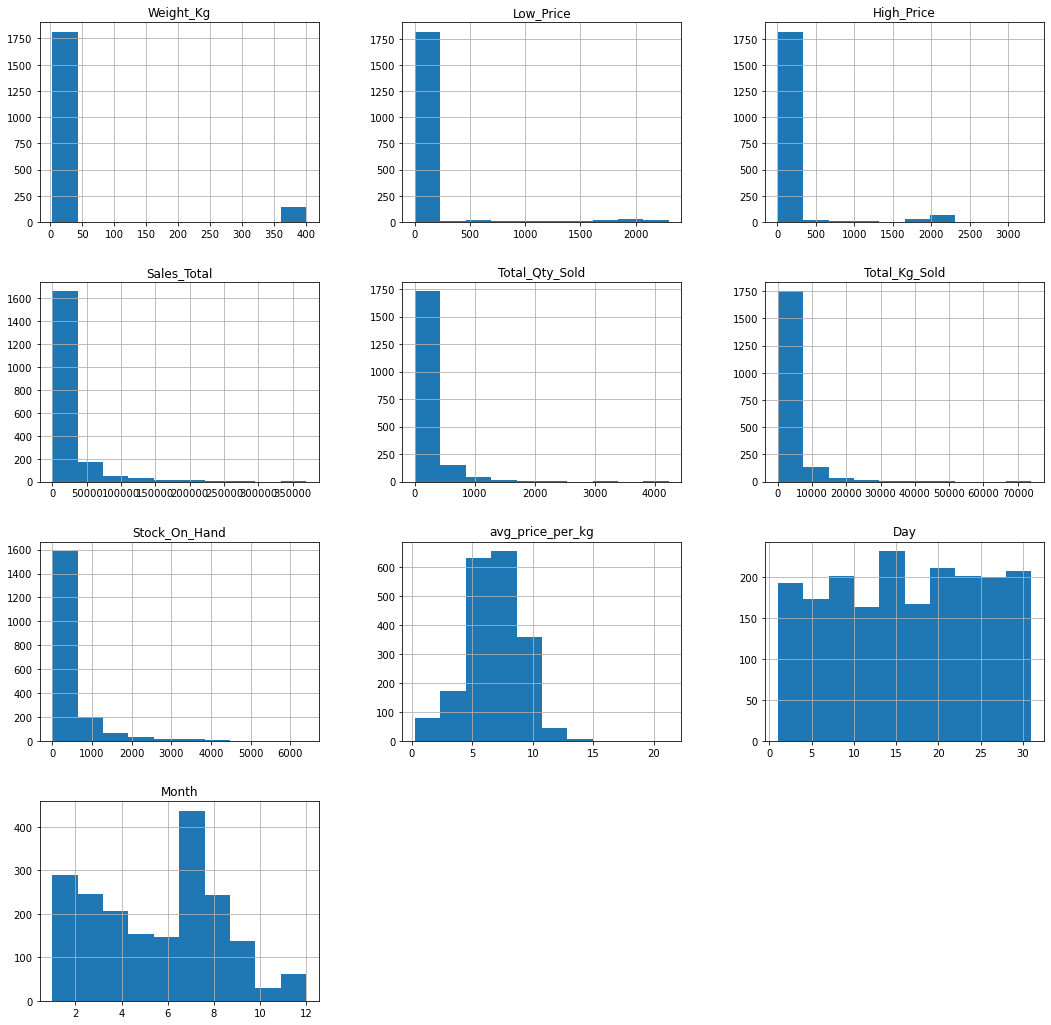

In [39]:
num_features = train.select_dtypes(include = ['int64', 'float64']).columns
train[num_features].hist(figsize = (18, 18))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

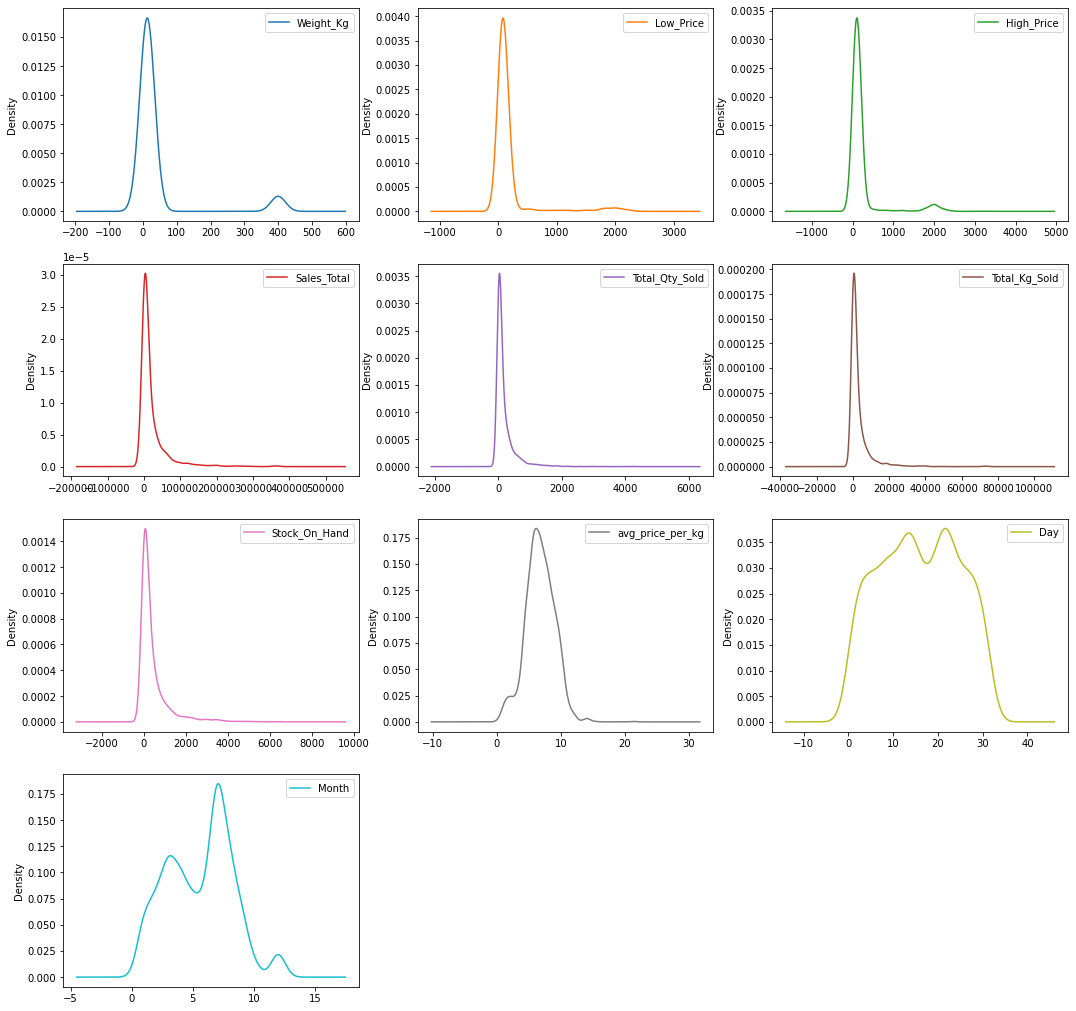

In [26]:
train[num_features].plot(kind = "density", subplots = True, layout = (4, 3), figsize = (18, 18), sharex = False)

Observing the histogram and density plot, it is clear that the same information is being display. It is just smoother version of the histogram.

As shown in the kurtosis, there are 7 features with outliers that lies far outside the range. Below is a graphical presentation of how far they actually are.

<AxesSubplot:xlabel='Stock_On_Hand'>

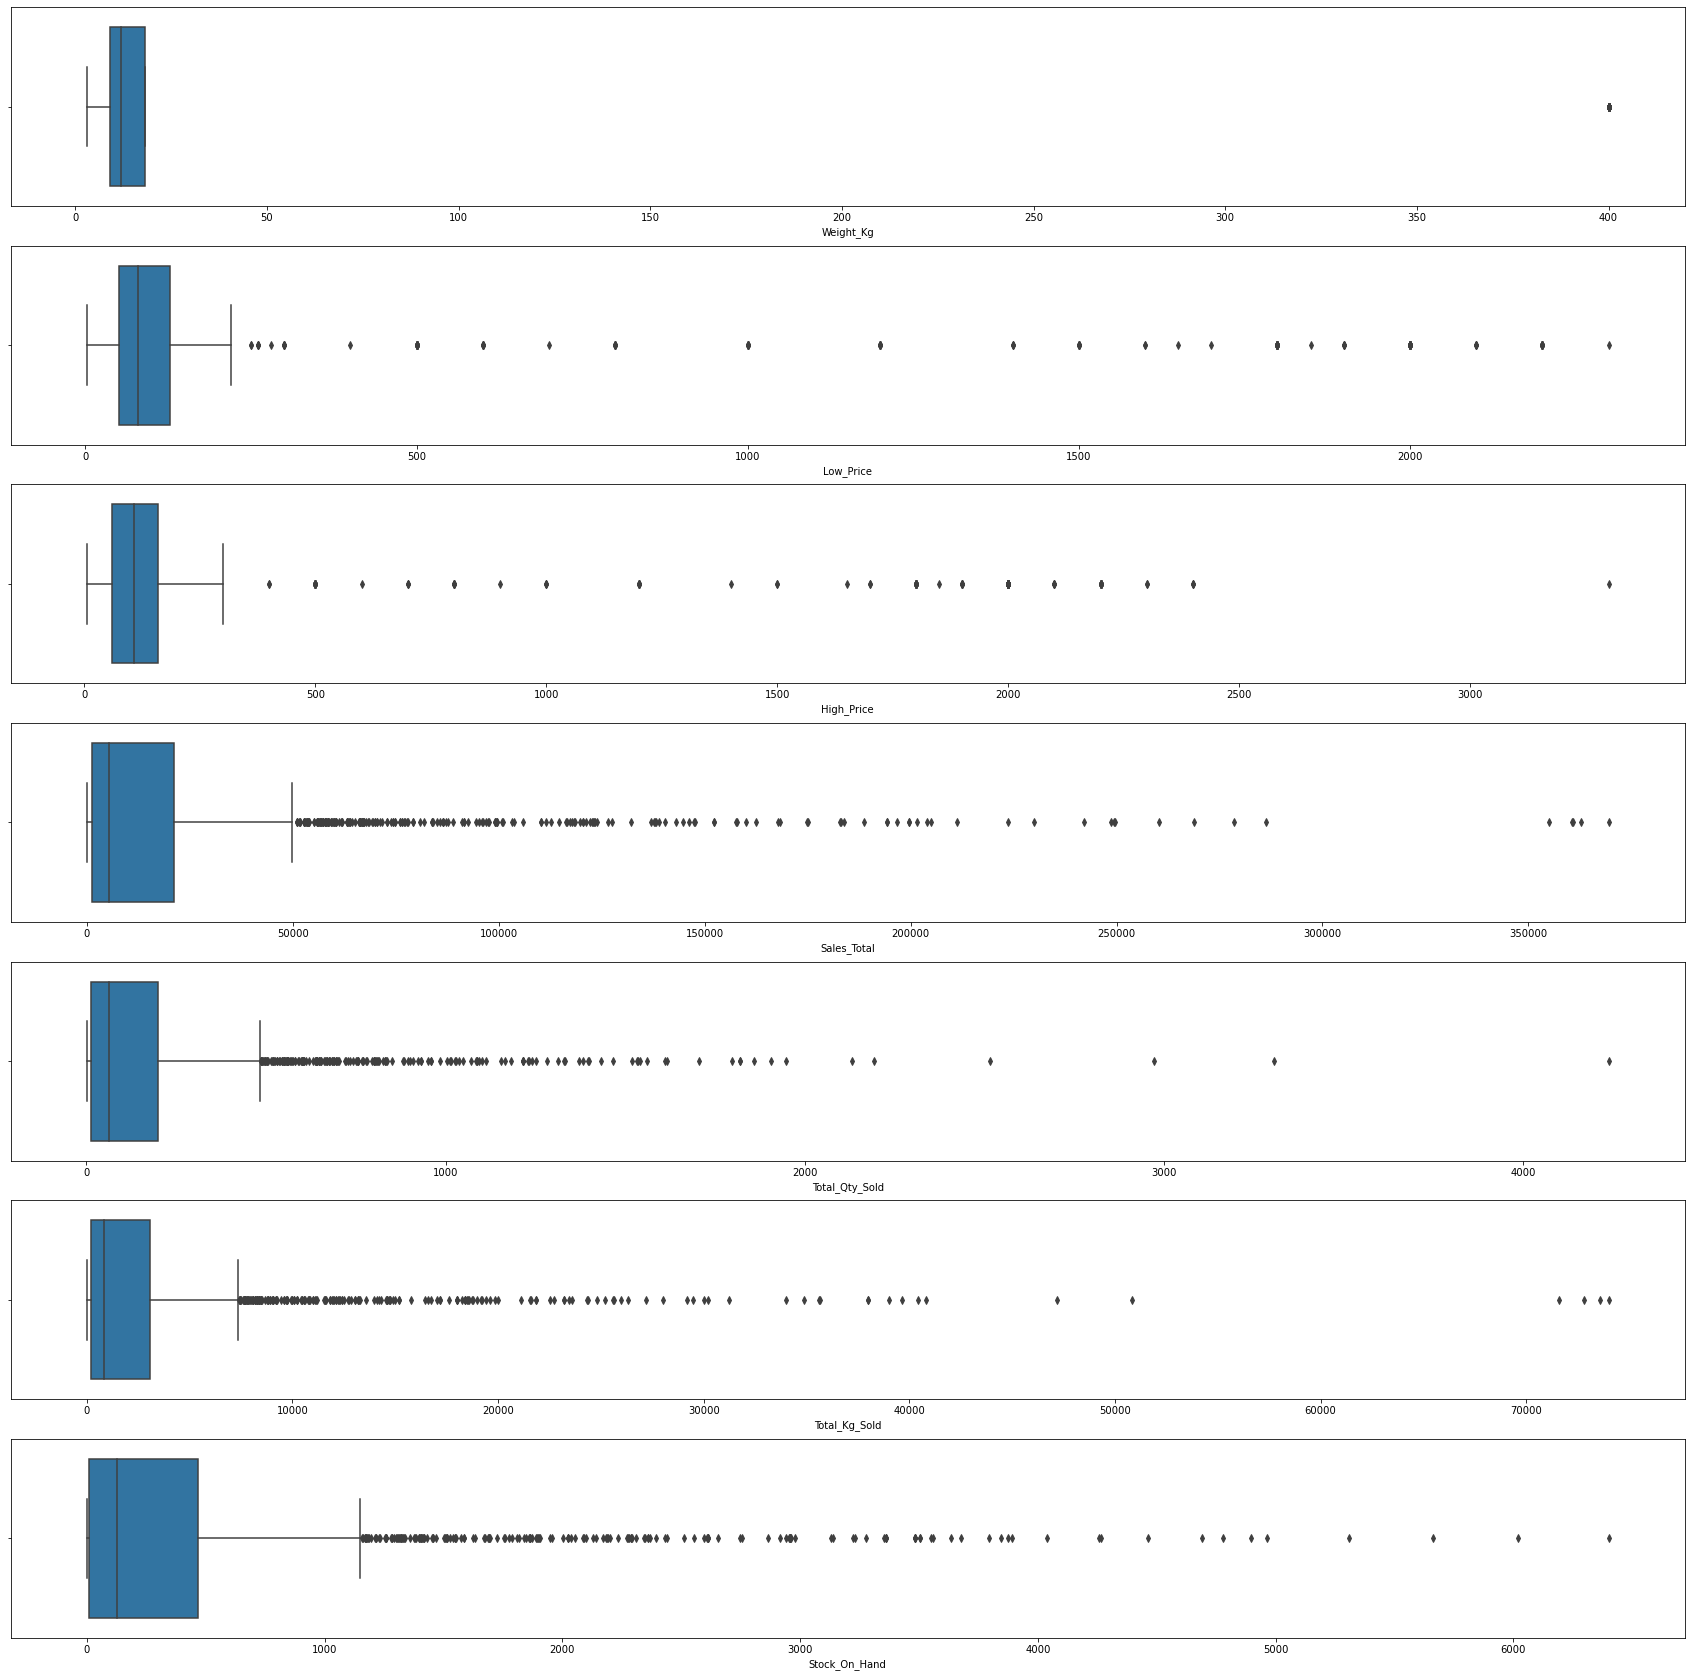

In [33]:
fig, ax = plt.subplots(nrows = 7,ncols = 1, figsize=(30, 30), sharex = 'row')
sns.boxplot(ax=ax[0,], data=train, x='Weight_Kg')
sns.boxplot(ax=ax[1], data=train, x='Low_Price')
sns.boxplot(ax=ax[2], data=train, x='High_Price')
sns.boxplot(ax=ax[3], data=train, x='Sales_Total')
sns.boxplot(ax=ax[4], data=train, x='Total_Qty_Sold')
sns.boxplot(ax=ax[5], data=train, x='Total_Kg_Sold')
sns.boxplot(ax=ax[6], data=train, x='Stock_On_Hand')



Next we will be looking at plots for all categorical features

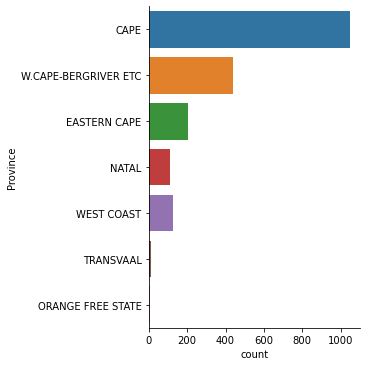

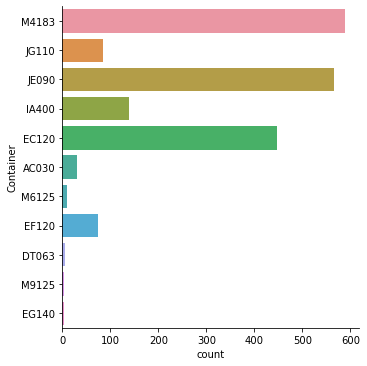

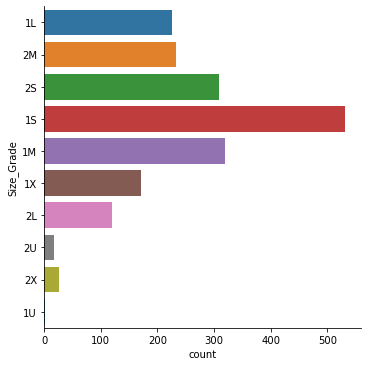

In [35]:
sns.catplot(y="Province", kind="count", data=train, orient ='v')
sns.catplot(y="Container", kind="count", data=train)
sns.catplot(y="Size_Grade", kind="count", data=train)

###  Multivariate Analysis

#### Statistical Overview

We use the `get_dummies()` method to transform our categorical data into numeric data by adding additional columns that represents each distinct category.

Below a `True` argument was passed into the `drop_first` parameter to create n - 1 categories for n categorical features.

In [212]:
df_train = pd.get_dummies(data = train, columns = ['Province', 'Container', 'Size_Grade'], drop_first = True)
df_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,9,9,...,0,0,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,...,0,0,0,0,0,0,1,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,16,4,...,0,0,0,0,0,0,0,1,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,...,0,0,1,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,28,9,...,0,0,1,0,0,0,0,0,0,0


Using the Pearson correlation measure the linear relationship between features.

In [213]:
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Day,Month,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886,0.016251,0.047613,...,-0.011011,-0.046532,0.314679,-0.007124,-0.068923,-0.080647,-0.083726,-0.064374,-0.029488,-0.036183
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740,-0.015764,0.039084,...,-0.009207,-0.023629,0.288148,-0.008087,-0.025554,-0.084578,-0.104532,-0.102040,-0.032675,-0.038494
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496,0.002058,0.047717,...,-0.011222,-0.039365,0.331683,-0.007067,-0.030418,-0.092192,-0.118314,-0.118517,-0.035822,-0.042342
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473,-0.011699,-0.055853,...,-0.012063,-0.057071,0.285465,-0.012618,-0.075793,-0.105784,-0.109908,-0.132595,-0.040623,-0.046104
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536,-0.020402,-0.058639,...,-0.010528,-0.061837,0.202586,-0.012138,-0.100508,-0.085270,-0.037270,-0.027759,-0.032337,-0.033339
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007,0.003238,-0.023098,...,-0.011677,-0.076261,0.306478,-0.010024,-0.081291,-0.097158,-0.093815,-0.100862,-0.035961,-0.041667
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028,0.081923,-0.011749,...,-0.022123,-0.028461,0.171355,-0.015715,-0.044300,-0.086927,-0.086702,-0.008891,-0.046085,-0.005271
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000,-0.071334,0.005205,...,0.002812,0.175779,-0.028506,-0.027335,0.251451,-0.089733,-0.153372,-0.352996,-0.069457,-0.051624
Day,0.016251,-0.015764,0.002058,-0.011699,-0.020402,0.003238,0.081923,-0.071334,1.000000,0.010012,...,-0.011418,-0.001329,0.028307,0.009691,-0.030633,0.014469,-0.029280,0.035713,0.019178,-0.026454
Month,0.047613,0.039084,0.047717,-0.055853,-0.058639,-0.023098,-0.011749,0.005205,0.010012,1.000000,...,-0.018631,-0.023882,0.035952,-0.007261,-0.064184,0.067404,0.012777,-0.022811,-0.047931,0.013578


-------------------------------------------------------------------------------------------------------------------

#### Visualisation Overview

-------------------------------
----------------------------

## Model Building

In [7]:
# Defining Functions for ease of quick calculations
def r_squared(y, y_pred):
    return r2_score(y, y_pred)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def mse(y, y_pred):
    return mean_squared_error(y, y_pred)

In [9]:
x = train[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Day', 'Month', 'Province', 'Container', 'Size_Grade']]
y = train['avg_price_per_kg']

In [215]:
x = df_train[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Day', 'Month',
       'Province_EASTERN CAPE', 'Province_NATAL', 'Province_ORANGE FREE STATE',
       'Province_TRANSVAAL', 'Province_W.CAPE-BERGRIVER ETC',
       'Province_WEST COAST', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S',
       'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M',
       'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X']]
y = df_train['avg_price_per_kg']

In [216]:
x.columns

Index(['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Day', 'Month',
       'Province_EASTERN CAPE', 'Province_NATAL', 'Province_ORANGE FREE STATE',
       'Province_TRANSVAAL', 'Province_W.CAPE-BERGRIVER ETC',
       'Province_WEST COAST', 'Container_DT063', 'Container_EC120',
       'Container_EF120', 'Container_EG140', 'Container_IA400',
       'Container_JE090', 'Container_JG110', 'Container_M4183',
       'Container_M6125', 'Container_M9125', 'Size_Grade_1M', 'Size_Grade_1S',
       'Size_Grade_1U', 'Size_Grade_1X', 'Size_Grade_2L', 'Size_Grade_2M',
       'Size_Grade_2S', 'Size_Grade_2U', 'Size_Grade_2X'],
      dtype='object')

### Linear Regression


Using **Linear Regression** to model the relationship between the independent variable(s) and dependent variable by fitting a linear equation to the observed data.
<br>
<img src = 'https://miro.medium.com/max/2872/1*k2bLmeYIG7z7dCyxADedhQ.png' title = 'Linear Regression Equation' alt = 'Linear Regression Equation'></img>
<br>
<br>

Initializing an instance of the `LinearRegression()` class, splitting the data into 80% train and 20% test and fitting it to the model.

In [109]:
lr = LinearRegression()

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 1)

In [111]:
lr.fit(x_train, y_train)

LinearRegression()

Lets take a look at the **Intercept** and **Coefficients of predictors**.

In [112]:
intercept_lr = float(lr.intercept_)
intercept_lr

6.8196918239302295

In [113]:
df_lr_coef = pd.DataFrame(lr.coef_, x.columns, columns = ['Coefficients'])
df_lr_coef

,Coefficients
Weight_Kg,-0.019693
Low_Price,0.000919
High_Price,0.002492
Sales_Total,0.000113
Total_Qty_Sold,-0.003535
Total_Kg_Sold,-0.000573
Stock_On_Hand,0.000056
Day,-0.008294
Month,0.041522


Predicting the train and test datasets

In [100]:
lr_train_y_pred = lr.predict(x_train)
lr_test_y_pred = lr.predict(x_test)

In [115]:
rmse(y_test, lr_test_y_pred)

1.2606448496045881

-----------------------------------------------------------------------------------------------------------------------------------------------

### Lasso Regression

Lasso is a type of linear regression that uses shrinkage where data values are shrunk towards a central point, like the mean. This encourages **sparse models**.

Lasso performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. Which implies that some coefficients can be shrunk to zero and eliminated from the model. 
<br>
<img src = 'https://miro.medium.com/max/1886/1*Q1Wb5JAETogZ7Lz2x8J2qQ.png' title = 'Lasso Regression Equation' alt = 'Lasso Regression Equation'></img><br><br>

In [43]:
# Initializing an instance of the StandardScaler() class
scalar = StandardScaler()

In [44]:
# Fitting to data then transforming it 
x_scaled = scalar.fit_transform(x)

In [45]:
# Splitting data into 80% train and 20% test using the scaled data. Setting shuffle to False to prevent shuffling before the data splits.
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_scaled,
                                                       y,
                                                       test_size = 0.20,
                                                       random_state = 1,
                                                       shuffle = False)

In [46]:
# Initializing an instance of the Lasso() class and setting hyperparameter "alpha" to 0.01 but it can be tuned over time.
lasso = Lasso(alpha = 0.01)

In [47]:
lasso.fit(x_train2, y_train2)

Lasso(alpha=0.01)

In [72]:
# Intercept of Lasso Model
lasso_intercept = float(lasso.intercept_)
lasso_intercept

6.80259256137762

In [73]:
# Preview of the coefficients
# --> As you can see below that some coefficients has been shrunk to zero and therefore is removed.
lasso_coeff = pd.DataFrame(lasso.coef_, x.columns, columns=['Coefficient'])
lasso_coeff

,Coefficient
Weight_Kg,-0.000000
Low_Price,0.219897
High_Price,0.580265
Sales_Total,2.216910
Total_Qty_Sold,-0.552307
Total_Kg_Sold,-1.742575
Stock_On_Hand,-0.054556
Day,-0.069396
Month,0.137537
Province_EASTERN CAPE,-0.425427


In [51]:
# Predicting the train and test values
lasso_y_pred_train = lasso.predict(x_train2)
lasso_y_pred_test = lasso.predict(x_test2)

-----------------------------------------------------------------------------------------------------------------------------------------------

### Ridge Regression

Ridge regression is a way to create a parsimonious model when the number of predictor variables in a set exceeds the number of observations, or when a data set has multicollinearity (correlations between predictor variables)

Ridge regression uses L2 Regulaization. Which adds an L2 penalty, which equals the square of the magnitude of coefficients.
<br>
<img src = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/01/eq5-1.png' title = 'Ridge Regression Equation' alt = 'Ridge Regression Equation'></img><br><br>

In [74]:
ridge_scalar = StandardScaler()

In [75]:
ridge_x_scaled = ridge_scalar.fit_transform(x)

In [77]:
# Split data into 80% train and 20% test
x_train_ridge, x_test_ridge, y_train_ridge, y_test_ridge = train_test_split(ridge_x_scaled, 
                                                                            y, 
                                                                            test_size=0.2, 
                                                                            random_state = 1)

In [78]:
ridge = Ridge()

In [79]:
ridge.fit(x_train_ridge, y_train_ridge)

Ridge()

In [80]:
# Intercept of the Ridge Model
ridge_intercept = float(ridge.intercept_)
print("Intercept:", float(ridge_intercept))

Intercept: 6.802440142202827


In [81]:
# Coefficients of predictors
coeff = pd.DataFrame(ridge.coef_, x.columns, columns=['Coefficient'])
coeff

,Coefficient
Weight_Kg,-0.562596
Low_Price,0.216778
High_Price,0.612191
Sales_Total,2.667093
Total_Qty_Sold,-0.676843
Total_Kg_Sold,-2.141188
Stock_On_Hand,-0.089117
Day,-0.043749
Month,0.154166
Province_EASTERN CAPE,-0.461681


In [64]:
# Predicting train and test values
y_pred_train_ridge = ridge.predict(x_train_ridge)
y_pred_test_ridge = ridge.predict(x_test_ridge)

--------------------------

### XGBoost

XGBoost is an implementation of gradient boosted decision trees. It is an ensemble technique where new models are created that predicts the residuals of prior models and then adds them together to make the final prediction.

In [10]:
from xgboost import XGBRegressor

In [11]:
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(x, 
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)

In [12]:
xgb = XGBRegressor(subsample = 0.7, max_depth = 3, n_estimators = 700)
xgb.fit(x_train_xgb, y_train_xgb)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Province, Container, Size_Grade

In [203]:
y_predict_train = xgb.predict(x_train_xgb) 
y_predict_test = xgb.predict(x_test_xgb)

In [204]:
rmse(y_test_xgb, y_predict_test)

0.40499586372267404

### Comparison between Regression Models

In [87]:
compare_df = pd.DataFrame({'Training RMSE': [rmse(y_train, lr_train_y_pred), 
                                             rmse(y_train2, lasso_y_pred_train),
                                            rmse(y_train_ridge, y_pred_train_ridge),
                                            rmse(y_train_xgb, y_predict_train)],
                            'Test RMSE': [rmse(y_test, lr_test_y_pred), 
                                          rmse(y_test2, lasso_y_pred_test),
                                         rmse(y_test_ridge, y_pred_test_ridge),
                                         rmse(y_test_xgb, y_predict_test)],
                            'Train R2': [r_squared(y_train, lr_train_y_pred), 
                                         r_squared(y_train2, lasso_y_pred_train),
                                        r_squared(y_train_ridge, y_pred_train_ridge),
                                        r_squared(y_train_xgb, y_predict_train)],
                            'Test R2': [r_squared(y_test, lr_test_y_pred), 
                                        r_squared(y_test2, lasso_y_pred_test),
                                       r_squared(y_test_ridge, y_pred_test_ridge),
                                       r_squared(y_test_xgb, y_predict_test)]},
                        index = ['Linear', 'Lasso', 'Ridge', 'XGBoost'] )

In [88]:
compare_df

,Training RMSE,Test RMSE,Train R2,Test R2
Linear,1.428031,1.260645,0.607921,0.643842
Lasso,1.389992,1.453367,0.611625,0.604500
Ridge,1.428139,1.260583,0.607862,0.643876
XGBoost,0.065651,0.431869,0.999171,0.958201


## Model Deployment

#### Saving Model

In [101]:
model_path = "model.pkl"
with open(model_path, 'wb') as file:
    pickle.dump(lr, file)

#### Pre-processing on Test set

In [122]:
test['Date'] = pd.to_datetime(test['Date'])
test['Day'] = test['Date'].dt.day
test['Month'] = test['Date'].dt.month
test.drop(['Date'], inplace = True, axis = 1)

KeyError: 'Date'

In [131]:
df_test = pd.get_dummies(data = test, columns = ['Province', 'Container', 'Size_Grade'], drop_first = True)

In [125]:
test = test.drop(['Commodities', 'Index'], axis = 1)

In [126]:
df_test = test[['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Day', 'Month']]

In [127]:
df_test.shape

(685, 9)

In [129]:
y_predict_test_set = xgb.predict(df_test)

In [130]:
y_predict_test_set

array([10.854759  , 12.599119  , 10.009209  ,  8.775707  ,  8.323423  ,
        4.41949   ,  3.58326   ,  7.7294397 ,  8.671046  ,  9.575242  ,
        4.9565716 ,  5.761017  ,  8.374034  ,  4.01423   ,  4.3540106 ,
        6.088446  ,  7.8534555 ,  4.5235734 , 10.335755  ,  6.234511  ,
        5.8942537 ,  4.7042265 ,  5.7697935 ,  7.7632985 ,  5.4997077 ,
        6.4246936 ,  7.4924064 ,  7.937735  ,  7.413133  ,  7.215744  ,
        8.2157345 ,  5.443363  ,  9.731802  ,  7.6012516 ,  4.8864803 ,
        9.855665  , 11.075384  , 11.478128  ,  6.1751933 ,  6.666028  ,
        9.001234  ,  8.269674  ,  4.993976  ,  6.3206754 ,  5.702618  ,
        4.515371  ,  5.0001698 ,  5.4986463 ,  6.0133724 ,  5.0426364 ,
        1.5327114 ,  6.605175  ,  6.0409646 , 14.102836  ,  9.343944  ,
        5.118272  , 11.568159  ,  9.234915  ,  8.151326  ,  5.6629963 ,
        7.8329005 , 11.208102  ,  6.3033295 ,  9.016696  ,  5.6736636 ,
        6.0620904 ,  6.9370203 ,  4.680283  ,  5.7113147 ,  7.15

#### Export Predict to csv file

In [131]:
index_len = [x + 1 for x in range(len(y_predict_test_set))]

In [132]:
submit = pd.DataFrame({'Index': index_len,
                     'avg_price_per_kg': y_predict_test_set})

In [133]:
submit.head()

,Index,avg_price_per_kg
0,1,10.854759
1,2,12.599119
2,3,10.009209
3,4,8.775707
4,5,8.323423


In [134]:
submit.to_csv('submit_set.csv', index = False)